In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        n = len(X)
        X1, X2 = np.array(X[:, 0], dtype='float64'), np.array(X[:, 1], dtype='float64')
        
        X1_, X2_, Y_ = np.sum(X1), np.sum(X2), np.sum(Y)
        
        sum_x12 = np.sum(X1 * X1)
        sum_x22 = np.sum(X2 * X2)
        sum_x1y = np.sum(X1 * Y)
        sum_x2y = np.sum(X2 * Y)
        sum_x1x2 = np.sum(X1 * X2)
        
        den = (sum_x12 * sum_x22) - (sum_x1x2 ** 2)
        
        self.b1 = ((sum_x22 * sum_x1y) - (sum_x1x2 * sum_x2y)) / den
        self.b2 = ((sum_x12 * sum_x2y) - (sum_x1x2 * sum_x1y)) / den
        self.a = (Y_ - self.b1 * X1_ - self.b2 * X2_) / n
        
        print(self.b1, self.b2, self.a)
    
    def predict(self, X):
        return self.b1 * X[:, 0] + self.b2 * X[:, 1] + self.a

In [3]:
data = pd.read_csv('datasilver.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           42 non-null     int64
 1   Gold Prices    42 non-null     int64
 2   Silver Prices  42 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [5]:
data.head()

,Year,Gold Prices,Silver Prices
0,1981,1800,2715
1,1982,1645,2720
2,1983,1800,3105
3,1984,1970,3570
4,1985,2130,3955


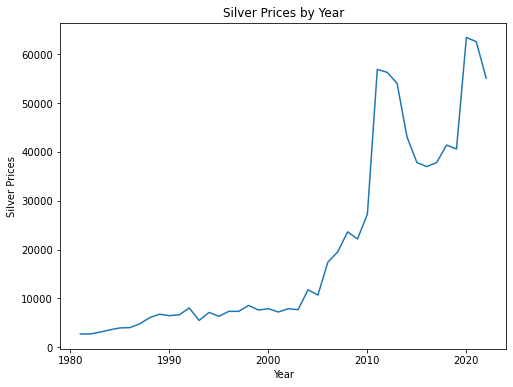

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Silver Prices'])
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[2])
plt.title('Silver Prices by Year')
plt.show()

In [7]:
X, Y = data[['Year', 'Gold Prices']].values, data['Silver Prices'].values.reshape(-1, 1)

In [8]:
mymodel = MyLinearRegression()

mymodel.fit(X, Y)

Y_pred = mymodel.predict(X)

430.7010809582421 -0.30976196951512747 -837363.5259125007


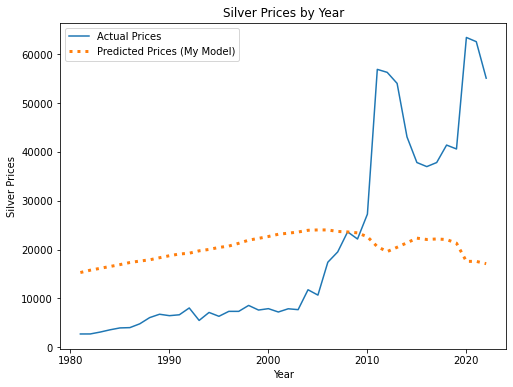

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Silver Prices'], label='Actual Prices')
plt.plot(X[:, 0], Y_pred, ':', label='Predicted Prices (My Model)', linewidth=3)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[2])
plt.title('Silver Prices by Year')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

skmodel = LinearRegression()

skmodel.fit(X, Y)

skY_pred = skmodel.predict(X)

In [11]:
print(skmodel.coef_[0], skmodel.intercept_)

[205.61188432   1.12883488] [-406636.42608835]


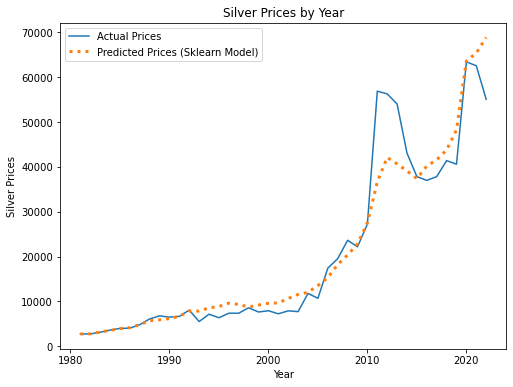

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Silver Prices'], label='Actual Prices')
plt.plot(X[:, 0], skY_pred, ':', label='Predicted Prices (Sklearn Model)', linewidth=3)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[2])
plt.title('Silver Prices by Year')
plt.legend()
plt.show()

In [14]:
print(f'Sklearn Model Line Equation: {skmodel.intercept_[0]} + {skmodel.coef_[0][0]} * X1 + {skmodel.coef_[0][1]} * X2')

Sklearn Model Line Equation: -406636.42608834937 + 205.6118843240283 * X1 + 1.1288348803612045 * X2


In [15]:
diff = Y - Y_pred

In [16]:
print(f'Error: {np.sum(diff)}')

Error: -1.5087425708770752e-07


In [17]:
mse = np.sum(np.multiply(diff, diff)) / len(X)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 16158332632.658648
Root Mean Squared Error: 127115.43034839888
